This article 

## 0. Sample Data

GPA Table


## 1. Motivation

Laboratory composition analysis of natural gas always includes "Plus" fractions, typically denoted as "Hexanes+ (C6+)" or "Heptanes+ (C7+)," representing all compounds equal to or heavier than hexane or heptane. For extended chromatograph analysis, labs might report compounds up to n-Decane (C10H22) and group heavier fractions as "Decanes+ (C10+)." The use of plus fractions stems from the limitations of chromatograph devices, which detect only a predefined set of pure compounds. Given the presence of potentially more than 100 different compounds, each with less than 0.1% mole fraction, it is impractical to determine the exact mole fractions of all compounds and convenient to input them into equation-of-state (EOS) software. Hence, the plus fractions are used. However, because a plus fraction is a pseudo-compound, it has no designated values for molecular weight ($MW$), critical pressure ($P_c$) and temperature ($T_c$), density ($\rho$), viscosity ($\mu$), or acentric factor ($\omega$), which are some of the required parameters for EOS modeling. *Characterization* of the plus fraction is needed to assign such properties for EOS modling. 

In <a href="https://www.bre.com/ProMax-Upstream.aspx" target="_blank">BRE ProMax</a>, a leading process simulation software in the upstream oil and gas industry, <strong>characterizing a plus fraction requires at least the normal boiling point or a combination of both molecular weight and liquid specific (or API) gravity</strong> (<a href="#fig-2" class="internal-link">Figure 2</a>). Although the normal boiling point is preferred for characterizing plus fractions<sup><a class="internal-link" href="#id1" id="id11">[1]</a> pg.144</sup>, distillation data is seldom reported for surface facility modeling (this may be different for PVT sims for downhole reservoir simulation). Thus, for tasks such as C6+ or C7+ characterization, both molecular weight and liquid specific gravity are necessary. Unfortunately, real life lab reports don't always come with both $MW$ and liquid specific gravity data for the plus fractions. <u><strong>However, they always report gross heating values (GHV), which can be empircially correlated to calculate $MW$ and liquid density. </strong></u>

<div class="row full_screen_margin_70 mobile_responsive_plot_full_width" style="" id="fig-2">
<div class="col"><img src="jupyter_images/ghv_promax_screenshot_1.png"></div></div> 

<div class="col-12 fig-title"><p class="image-description"><strong>Figure 2:</strong> Screenshot of <a href="https://www.bre.com/ProMax-Upstream.aspx" target=_blank>BRE ProMax</a> illustrating the characterization of the Heptanes+ (C7+) fraction. The software necessitates either the normal boiling point or a combination of molecular weight and specific (or API) gravity for component characterization. Cells highlighted in blue indicate user inputs, while those in black display calculated values.</p></div>
<div><hr></div>

<a href="#fig-3" class="internal-link">Figure 3</a> below presents real-life gas sample analyses obtained from atmospheric tanks (Type 1 and 4), a high-pressure separator at 690 psig (Type 2), and a gas salesline operating at 58 psig (Type 3). Types 1 and 2 do not report liquid density, as the original samples were in a gaseous phase. Typically, gas samples report gas specific gravity, while liquid samples report liquid specific (or API) gravity. Since process simulation software requires liquid specific gravity, it can be correlated from the GHV values, discussed in more detail <a href="#" class="internal-link">below</a>. Additionally, Type 2 lacks properties of the plus fractions, which can be computed using the molecular weighted average of known compounds. Type 3 includes calculated $MW$ and liquid specific gravity, suitable for direct input for C7+ characterization, although these values are not measured but computed by making assumptions about the compositions of the plus fractions. For C7+, it's reasonable to assume a 50% mix of n-hexane (C6H14) and n-heptane (C7H16) for natural gas samples. Type 4 explicitly outlines assumptions for the composition of the plus fraction. In this scenario, explicit characterization of the plus fraction is unnecessary; users can redistribute the mole fraction of the plus fraction (1.472%) based on the ratio of assumed compounds (C6-60%, C7-30%, C8-10%).

<div class="row full_screen_margin_80 mobile_responsive_plot_full_width" style="" id="fig-3">
<div class="col"><img src="jupyter_images/gas_sample_types.png"></div></div>    
<div class="col-12 fig-title"><p class="image-description"><strong>Figure 3:</strong> Examples of gas sample analyses. <u>Type 1</u> reports gas specific gravity, as the sample was taken in a gaseous phase. Process simulation software requires liquid specific gravity, which can be calculated using empirical correlation with the GHV value. <u>Type 2</u> does not report properties of the Hexane+ fraction separately, but rather for the entire sample. The properties of the plus fraction can be derived by back-solving with the molecular-weighted average of known compounds. <u>Type 3</u> includes both molecular weight and liquid density values (highlighted in orange). However, it is important to note that laboratories providing these values typically make assumptions about the compositions of the plus fractions, such as a distribution of C6-60%, C7-30%, and C8-10%, as illustrated in <u>Type 4</u>. Although not the most accurate method for characterizing the plus fraction, it offers convenience.</p></div>

## 2. Understanding Types of GHVs reported in lab analysis

There are 6 types of heating values you will see on lab reports: 1) gross heating value, 2) net heating value, 3) dry basis, 4) wet (saturated) basis, 5) ideal-gas heating value, and 6) real-gas heating value.

<div><hr></div>

<strong>Gross Heating Value:</strong> GHV includes the total amount of heat released when a fuel is burned completely and the combustion products are returned to a pre-combustion temperature, typically 60°F. Crucially, GHV accounts for the latent heat of vaporization of water produced during combustion. This means that if water vapor is produced as a combustion product, the heat required to condense it back into liquid water is included in the GHV. The water here refers to a product of a combustion reaction, such as in: $CH_4 + O_2 \rightarrow CO_2 + H_2O$. It is not the water moisture content present in the original sample before combustion.

<strong>Net Heating Value:</strong> This is GHV minus the latent heat of vaporization of water produced during combustion. This is a theoretical value because the amount of post-combustion water cannot be measured.

<strong>Dry basis:</strong> This is a measurement of the fuel's heating value after all moisture has been removed. Accuracy of most chromatograph devices for mole fraction determination of known compounds drops in the presence of water, so it's a common practice to remove any water content prior to running the sample into the chromatograph devices. This is the reason that mole fractions of the lab reports do not include water fraction. Dry basis gross heating value can be measured by a bomb calorimeter if the sample is oven dried.

<strong>Wet (saturated) basis:</strong> Wet basis gross heating value can be measured by a bomb calorimeter using the sample as is.

<strong>Ideal-gas heating value:</strong> Calculated assuming the gas follows the ideal gas law, where the gas compressibility factor (Z) is considered to be 1. This simplification is useful for theoretical calculations and scenarios where gas behaves nearly ideally, typically at standard conditions of temperature and pressure.

<strong>Real-gas heating value:</strong> This is GHV divided by a Z-factor. For practical purposes, one could always assume Z=0.99 for all lab reports since most labs operate at standard conditions.

<div><hr></div>

It should be noted that the GHV figures reported in laboratory analyses are generally computed rather than directly measured through methods such as bomb calorimetry. In most lab reports, the GHVs of identified compounds are derived from values listed in the GPA 2145-16 compound property data table<sup><a class="internal-link" href="#id2" id="id21">[2]</a></sup>. For the GHV estimation of unknown (plus) fractions, a specific composition ratio is typically presumed (ex: 60% C6, 30% C7, and 10% C8 for Hexanes+). The GPA 2145 standard uses dry-basis ideal gas gross heating value. Consequently, <u><strong>the dry-basis ideal gas gross heating value is the preferred metric for correlating GHV with molecular weight and specific gravity.</strong></u>

### 3. Impact of PNA composition on GHV

Paraffin-Naphthene-Aromatic (PNA) composition refers to ratio of each hydrocarbon groups that make up compositions of unrefined natural gas and crude oil. It matters for the purposes of correlating GHV of C6+ or C7+ fractions to molecular weight due to different energy-mass density bewtween paraffins vs. aromatics. Consider <a href="#fig-4" class="internal-link">Figure 4</a>, which demonstrates a strong linear correlation with GHVs and molecular weight of hydrocarbon compounds. Notably, this figure illustrates the difference in energy density per molar mass between aromatic (green) vs. paraffinic (blue) compounds, with paraffinic compounds displaying a higher energy density per mass than aromatics. This discrepancy is attributed to paraffins having a higher hydrogen to carbon ratio compared to aromatics. The GHV of a carbon atom is approximately 32.8kJ/g, whereas for a hydrogen atom, it is 141.8kJ/g; hydrogen possesses 4.32 times more energy per mass than carbon. <strong><u>Consequently, natural gas or crude oil with a lower proportion of paraffinic composition will exhibit reduced energy density per molar mass due to their decreased hydrogen to carbon ratio.</u></strong>

<div class="row full_screen_margin_90 mobile_responsive_plot_full_width" style="" id="fig-4">
<div class="col"><img src="jupyter_images/ghvs_vs_mws.png"></div></div>    
<div class="col-12 fig-title"><p class="image-description"><strong>Figure 4:</strong> Scatter plot of known compounds upto n-hexadecane (C16H34) listed in the GPA 2145 table<sup><a class="internal-link" href="#id2" id="id22">[2]</a></sup>. Compounds that have "cyclo" in their compound name are identified as naphthenic. Compounds that follow chemical formula of $C_nH_{2n + 2}$ are idenfitied as paraffins. Compounds that have "toluene", "benzene", and "xylene" are identified as aromatics (styrene and napthalene are also identified as aromatics). Compounds that have $-OH$ in their chemical formula as hydroxlys. Compounds that contain $C$ and $H$ atoms in their formula as identified as other hydrocarbons.</p></div>

<div class="solution_panel closed">
    <div class="solution_title">
        <p class="solution_title_string">Source Code For Figure (4)</p>
        <ul class="nav navbar-right panel_toolbox">
            <li><a class="collapse-link"><i class="fa fa-chevron-down"></i></a></li>
        </ul>
    <div class="clearfix"></div>
    </div>
    <div class="solution_content">
        <pre>
            <code class="language-python">
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('GPA 2145-16 Compound Properties Table - English - Truncated and PNA Identified.csv')

# Labeling for displaying texts
labels = ['methane', 'propane', 'n-butane', 'n-heptane', 'n-octane', 'n-decane', 'cyclohexane', 'cyclopentane', 'ethane',
'n-dodecane','n-tetradecane','n-hexadecane', 'methanol', 'ethanol', 'naphthalene', 'isobutylcyclopentane', 'hydrogen',
 'sulfur dioxide', 'hydrogen sulfide', 'toluene', 'benzene', 'm-xylene', 'pentylbenzene', 'hexylbenzene',
         'propylene', '1-butene'
         ]
df['Display Text'] = df['Compound'].isin(labels)

BTEX_idx = df[df['Is BTEX'] == True].index
aromatic_idx = df[df['Is Aromatic'] == True].index
non_HC_idx = df[df['Is Hydrocarbon'] == False].index
hydroxyl_idx = df[df['Is Hydroxyl'] == True].index
paraffinic_idx = df[df['Is Paraffinic'] == True].index
naphethenic_idx = df[df['Is Naphthenic'] == True].index
other_idx = df[df['Others'] == True].index
whole_idx = list(df.index)

x = df['Molar Mass [g/mol]']
y = df['Gross Heating Value Ideal Gas [Btu/ft^3]']

##################################### Plotting #######################################

fig, ax = plt.subplots(figsize=(8, 4.5))

alpha = 1
_1 = ax.scatter(x.loc[paraffinic_idx], y.loc[paraffinic_idx], s=50, edgecolor='k', alpha=alpha, label='Paraffinic')
_2 = ax.scatter(x.loc[naphethenic_idx], y.loc[naphethenic_idx], s=50, edgecolor='k', alpha=alpha, label='Naphthenic')
_3 = ax.scatter(x.loc[aromatic_idx], y.loc[aromatic_idx], s=50, edgecolor='k', alpha=alpha, label='Aromatic/BTEX')
_4 = ax.scatter(x.loc[hydroxyl_idx], y.loc[hydroxyl_idx], s=50, edgecolor='k', alpha=alpha, label='Hydroxylic')
_5 = ax.scatter(x.loc[non_HC_idx], y.loc[non_HC_idx], s=50, edgecolor='k', alpha=alpha, label='Non-HCs')
_6 = ax.scatter(x.loc[other_idx], y.loc[other_idx], s=50, edgecolor='k', alpha=alpha, label='Other-HCs')

c1 = _1.get_facecolor()[0]
c2 = _2.get_facecolor()[0]
c3 = _3.get_facecolor()[0]
c4 = _4.get_facecolor()[0]
c5 = _5.get_facecolor()[0]
c6 = _6.get_facecolor()[0]

ax.legend(fontsize=9, ncol=3)

texts = df['Compound']
for i, txt in enumerate(texts):
    if df['Display Text'].loc[i]:
        c = c5
        ha ='left'
        va = 'top'
        
        if df['Is Paraffinic'].loc[i]: 
            c = c1
            ha ='right'
            va = 'bottom'
        if df['Is Naphthenic'].loc[i]:
            c = c2
            ha ='right'
            va = 'bottom'
        if df['Is Aromatic'].loc[i]:
            c = c3
            va = 'top'
            ha = 'left'
        if df['Is Hydroxyl'].loc[i]:
            c = c4
            va = 'bottom'
            ha = 'left'
        if df['Others'].loc[i]:
            c = c6
            va = 'top'
            ha = 'left'
        
        if ha == 'left':
            icr = 3
        else:
            icr= -3
        
        ax.annotate(txt, (x.loc[i] + icr, y.iloc[i]), fontsize=10, c=c, ha=ha, va=va)

ax.minorticks_on()
ax.grid(axis='y', which='major', linestyle='--', color='grey', alpha=0.5)
#ax.grid(axis='y', which='minor', linestyle='--', color='grey', alpha=0.2)
#ax.grid(axis='x', which='minor', color='grey', linestyle='--', alpha=0.2)
ax.grid(axis='x', which='major', color='grey', linestyle='--', alpha=0.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xlabel('Molecular Weight [g/mol]', fontsize=11)
ax.set_ylabel('Gross Heating Value [Btu/scf]', fontsize=11)
ax.text(0.99, 0.1, 'aegis4048.github.io', fontsize=12, ha='right', va='center',
    transform=ax.transAxes, color='grey', alpha=0.5)

#ax.set_xlim(0, 1)
#ax.set_ylim(10000, 30000)

def setbold(txt):
    return ' '.join([r"$\bf{" + item + "}$" for item in txt.split(' ')])

bold_txt = setbold('Gross Heating Value vs. Molecular Weight')
plain_txt = r', For different compound groups'
fig.suptitle(bold_txt + plain_txt, verticalalignment='top', x=0, horizontalalignment='left', fontsize=12, y=0.96)
yloc = 0.88
ax.annotate('', xy=(0.01, yloc + 0.01), xycoords='figure fraction', xytext=(1.02, yloc + 0.01),
            arrowprops=dict(arrowstyle="-", color='k', lw=0.7))

ax.annotate('Data source: GPA 2145-16', xy=(-0.11, -.12), xycoords='axes fraction', fontsize=9)

fig.tight_layout()
            </code>
        </pre>
    </div>
</div>

<div class="alert alert-info">
    <h4>Notes: What are paraffins, naphthenes, and aromatics?</h4>
    <p>Paraffins, naphtehens, and aromatics the primary hydrocarbon groups 
        that make up compositions of the naturally occuring crude oil and natural gas. The below is a brief on each of them: </p>    
    <p><strong>Paraffins:</strong> Known as alkanes, paraffins follow the general formula $C_nH_{2n+2}$. This group is characterized by its high hydrogen to carbon ratio, contributing to their higher energy density per mass compared to other hydrocarbon types. Examples include Methane (CH₄), Ethane (C₂H₆), Propane (C₃H₈), Butane (C₄H₁₀), Pentane (C₅H₁₂), Hexane (C₆H₁₄), Heptane (C₇H₁₆), Octane (C₈H₁₈), Nonane (C₉H₂₀), and Decane (C₁₀H₂₂).</p>
    <p><strong>Naphthenes:</strong> Also known as cycloalkanes, naphthenes are very similar to paraffins and follow the general chemical formula $C_nH_{2n}$. Compounds typically containing "cyclo" in their names are considered naphthenic. Examples are Cyclopropane (C₃H₆), Cyclobutane (C₄H₈), Cyclopentane (C₅H₁₀), Cyclohexane (C₆H₁₂), Cycloheptane (C₇H₁₄), Cyclooctane (C₈H₁₆), Cyclononane (C₉H₁₈), Cyclodecane (C₁₀H₂₀), Methylcyclopentane (C₆H₁₂), and Ethylcyclohexane (C₈H₁₆).</p>
    <p><strong>Aromatics:</strong> This class of hydrocarbons is characterized by one or more benzene rings in their molecular structure. The simplest aromatic compound, benzene, has the chemical formula $C_6H_6$. Aromatic compounds generally follow the formula $C_nH_n$ for monocyclic aromatics, but the presence of multiple rings and substituents can alter this formula. The carbon to hydrogen ratio for aromatics is generally 1:1, less than half of paraffins, explaining aromatics' lower energy density per mass. BTEX compounds fall within this class. Examples include Benzene (C₆H₆), Toluene (C₇H₈), Ethylbenzene (C₈H₁₀), o-Xylene (C₈H₁₀), m-Xylene (C₈H₁₀), p-Xylene (C₈H₁₀), Styrene (C₈H₈), Naphthalene (C₁₀H₈), Phenol (C₆H₅OH), and Aniline (C₆H₅NH₂).</p>
</div>

<a href="#fig-5" class="internal-link">Figure 5</a> presents linear regression models for paraffins and aromatics, showing identical slopes but differing intercepts. The higher intercept for aromatics suggests a larger molar mass for the same GHV compared to paraffins. The Hexanes+ properties in <a href="#fig-6" class="internal-link">Figure 6</a> help verify the models' accuracy. Assuming a purely paraffinic composition, the model estimates the molecular weight (MW) as MW = 0.0188 x (4849 Btu/scf) - 2.758 = 88.4 g/mol, given the Hexanes+ GHV of 4849 Btu/scf. Under the unrealistic assumption of a 100% aromatic composition, the prediction adjusts to MW = 0.0186 x (4849 Btu/scf) + 10.326 = 100.5 g/mol. Thus, the actual molecular weight is determined to lie within these predictions: 88.4 < 90.161 < 100.5 g/mol. The determination of the PNA composition of your sample is further explored in <a href="#3.1.-Approximation-of-PNA-composition-from-specific-gravity" class="internal-link">Section 3.1.</a>. 

<div class="row full_screen_margin_100 mobile_responsive_plot_full_width" style="" id="fig-5">
<div class="col"><img src="jupyter_images/mws_vs_ghv_pna.png"></div></div>    
<div class="col-12 fig-title"><p class="image-description"><strong>Figure 5:</strong> Linear regression on molecular weight vs. GHV for paraffins (left) and aromatics (right). They both have the same slope, but the linear model for aromatics has a bigger intercept, which translates to a bigger molar mass for the same GHV value compared to that of paraffins. </p></div>

<div class="solution_panel closed">
    <div class="solution_title">
        <p class="solution_title_string">Source Code For Figure (5)</p>
        <ul class="nav navbar-right panel_toolbox">
            <li><a class="collapse-link"><i class="fa fa-chevron-down"></i></a></li>
        </ul>
    <div class="clearfix"></div>
    </div>
    <div class="solution_content">
        <pre>
            <code class="language-python">
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

df = pd.read_csv('GPA 2145-16 Compound Properties Table - English - Truncated and PNA Identified.csv')

# Labeling for displaying texts
labels = ['methane', 'propane', 'n-butane', 'n-heptane', 'n-octane', 'n-decane', 'cyclohexane', 'cyclopentane', 'ethane',
'n-dodecane','n-tetradecane','n-hexadecane', 'methanol', 'ethanol', 'naphthalene', 'isobutylcyclopentane', 'hydrogen',
 'sulfur dioxide', 'hydrogen sulfide', 'toluene', 'benzene', 'm-xylene', 'pentylbenzene', 'hexylbenzene',
         'propylene', '1-butene'
         ]
df['Display Text'] = df['Compound'].isin(labels)

BTEX_idx = df[df['Is BTEX'] == True].index
aromatic_idx = df[df['Is Aromatic'] == True].index
non_HC_idx = df[df['Is Hydrocarbon'] == False].index
hydroxyl_idx = df[df['Is Hydroxyl'] == True].index
paraffinic_idx = df[df['Is Paraffinic'] == True].index
naphethenic_idx = df[df['Is Naphthenic'] == True].index
other_idx = df[df['Others'] == True].index
whole_idx = list(df.index)

y = df['Molar Mass [g/mol]']
x = df['Gross Heating Value Ideal Gas [Btu/ft^3]']


y1 = df[df['Is Paraffinic'] == True]['Molar Mass [g/mol]'].values
x1 = df[df['Is Paraffinic'] == True]['Gross Heating Value Ideal Gas [Btu/ft^3]'].values
combined = np.array(sorted(zip(y1.flatten(), x1), key=lambda pair: pair[1]))
y1 = combined[:, 0]
x1 = combined[:, 1].reshape(-1, 1)

ols_1 = LinearRegression().fit(x1, y1)
y_pred_1 = ols_1.predict(x1)
coefs_1 = ols_1.coef_
intercept_1 = ols_1.intercept_


y2 = df[df['Is Aromatic'] == True]['Molar Mass [g/mol]'].values
x2 = df[df['Is Aromatic'] == True]['Gross Heating Value Ideal Gas [Btu/ft^3]'].values
combined = np.array(sorted(zip(y2.flatten(), x2), key=lambda pair: pair[1]))
y2 = combined[:, 0]
x2 = combined[:, 1].reshape(-1, 1)

ols_2 = LinearRegression().fit(x2, y2)
y_pred_2 = ols_2.predict(x2)
coefs_2 = ols_2.coef_
intercept_2 = ols_2.intercept_


fig, axes = plt.subplots(1, 2, figsize=(11, 5))

axes[0].axline(xy1=(0, intercept_1), slope=coefs_1[0], linestyle='--', alpha=1, c='#1f77b4')
axes[1].axline(xy1=(0, intercept_2), slope=coefs_2[0], linestyle='--', alpha=1, c='#2ca02c')


axes[0].text(0, 205, '$MW = %.4f GHV %.3f$' % (coefs_1[0], intercept_1), fontsize=14, ha='left', va='center', color='#1f77b4')
axes[1].text(0, 205, '$MW = %.4f GHV + %.3f$' % (coefs_2[0], intercept_2), fontsize=14, ha='left', va='center', color='#2ca02c')


alpha = 0.15
_1 = axes[0].scatter(x.loc[paraffinic_idx], y.loc[paraffinic_idx], s=50, edgecolor='k', alpha=1, label='Paraffinic')
_2 = axes[0].scatter(x.loc[naphethenic_idx], y.loc[naphethenic_idx], s=50, edgecolor='k', alpha=alpha)
_3 = axes[0].scatter(x.loc[aromatic_idx], y.loc[aromatic_idx], s=50, edgecolor='k', alpha=0.05)
_4 = axes[0].scatter(x.loc[hydroxyl_idx], y.loc[hydroxyl_idx], s=50, edgecolor='k', alpha=alpha)
_5 = axes[0].scatter(x.loc[non_HC_idx], y.loc[non_HC_idx], s=50, edgecolor='k', alpha=alpha)
_6 = axes[0].scatter(x.loc[other_idx], y.loc[other_idx], s=50, edgecolor='k', alpha=alpha)

alpha = 0.15
_1 = axes[1].scatter(x.loc[paraffinic_idx], y.loc[paraffinic_idx], s=50, edgecolor='k', alpha=0.05)
_2 = axes[1].scatter(x.loc[naphethenic_idx], y.loc[naphethenic_idx], s=50, edgecolor='k', alpha=0.05)
_3 = axes[1].scatter(x.loc[aromatic_idx], y.loc[aromatic_idx], s=50, edgecolor='k', alpha=1, label='Aromatic/BTEX')
_4 = axes[1].scatter(x.loc[hydroxyl_idx], y.loc[hydroxyl_idx], s=50, edgecolor='k', alpha=alpha)
_5 = axes[1].scatter(x.loc[non_HC_idx], y.loc[non_HC_idx], s=50, edgecolor='k', alpha=alpha)
_6 = axes[1].scatter(x.loc[other_idx], y.loc[other_idx], s=50, edgecolor='k', alpha=alpha)


for ax in axes:
    ax.minorticks_on()
    ax.grid(axis='y', which='major', linestyle='--', color='grey', alpha=0.5)
    #ax.grid(axis='y', which='minor', linestyle='--', color='grey', alpha=0.2)
    #ax.grid(axis='x', which='minor', color='grey', linestyle='--', alpha=0.2)
    ax.grid(axis='x', which='major', color='grey', linestyle='--', alpha=0.5)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    ax.set_ylabel('Molecular Weight [g/mol]', fontsize=11)
    ax.set_xlabel('Gross Heating Value [Btu/scf]', fontsize=11)
    ax.text(0.99, 0.15, 'aegis4048.github.io', fontsize=10, ha='right', va='center',
        transform=ax.transAxes, color='grey', alpha=0.5)
    ax.legend(loc='lower right', fontsize=12)
    
def setbold(txt):
    return ' '.join([r"$\bf{" + item + "}$" for item in txt.split(' ')])

bold_txt = setbold('Molecular Weight and GHV correlation, ')
plain_txt = r'comparison for paraffins vs. aromatics'
fig.suptitle(bold_txt + plain_txt, verticalalignment='top', x=0.0, horizontalalignment='left', fontsize=13, y=0.965)
yloc = 0.885
ax.annotate('', xy=(0.01, yloc + 0.01), xycoords='figure fraction', xytext=(1.01, yloc + 0.01),
            arrowprops=dict(arrowstyle="-", color='k', lw=0.7))

axes[0].annotate('Data source: GPA 2145-16', xy=(-.13, -.16), xycoords='axes fraction', fontsize=9)

fig.tight_layout()
            </code>
        </pre>
    </div>
</div>

<div class="row full_screen_margin_70 mobile_responsive_plot_full_width" style="" id="fig-6">
<div class="col"><img src="jupyter_images/mw_btu_validation.png" style="margin-bottom: 10px;"></div></div>    
<div class="col-12 fig-title"><p class="image-description"><strong>Figure 6:</strong> Partial screenshot of a gas sample analysis shown in Type 3 of <a href="#fig-3" class="internal-link">Figure 3</a>. Note that this particular lab report computed the properties of the Hexanes Plus by making certain assumptions about the composition of the plus fraction. Generally, it's a common practice to assume 60% C6, 30% C7, and 10% C8 for C6+ fractions, but the exact assumptions made for this particular sample analysis are unknown.</p></div>

#### 3.1. Approximation of PNA composition from specific gravity 

The short answer is that you can assume 7% ~ 19.2% for most natural gas. For crude oils, you can't really make assumptions because the density of the plus fraction can vary a lot. 

In [ ]:
# Ordinary Least Squares
ols = LinearRegression().fit(X, y)
y_pred_ols = ols.predict(X)
coefs_ols = ols.coef_
intercept_ols = ols.intercept_

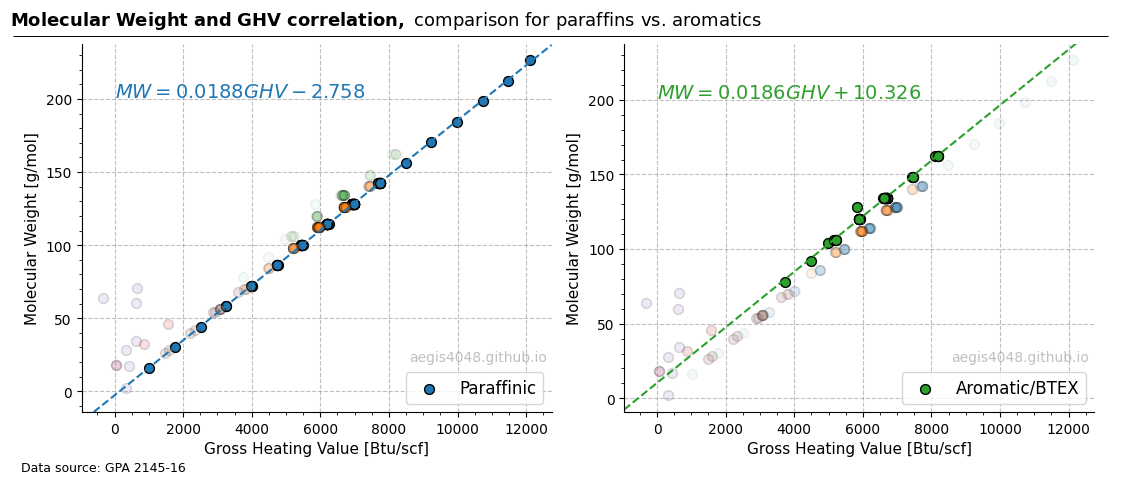

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

df = pd.read_csv('GPA 2145-16 Compound Properties Table - English - Truncated and PNA Identified.csv')

# Labeling for displaying texts
labels = ['methane', 'propane', 'n-butane', 'n-heptane', 'n-octane', 'n-decane', 'cyclohexane', 'cyclopentane', 'ethane',
'n-dodecane','n-tetradecane','n-hexadecane', 'methanol', 'ethanol', 'naphthalene', 'isobutylcyclopentane', 'hydrogen',
 'sulfur dioxide', 'hydrogen sulfide', 'toluene', 'benzene', 'm-xylene', 'pentylbenzene', 'hexylbenzene',
         'propylene', '1-butene'
         ]
df['Display Text'] = df['Compound'].isin(labels)

BTEX_idx = df[df['Is BTEX'] == True].index
aromatic_idx = df[df['Is Aromatic'] == True].index
non_HC_idx = df[df['Is Hydrocarbon'] == False].index
hydroxyl_idx = df[df['Is Hydroxyl'] == True].index
paraffinic_idx = df[df['Is Paraffinic'] == True].index
naphethenic_idx = df[df['Is Naphthenic'] == True].index
other_idx = df[df['Others'] == True].index
whole_idx = list(df.index)

y = df['Molar Mass [g/mol]']
x = df['Gross Heating Value Ideal Gas [Btu/ft^3]']


y1 = df[df['Is Paraffinic'] == True]['Molar Mass [g/mol]'].values
x1 = df[df['Is Paraffinic'] == True]['Gross Heating Value Ideal Gas [Btu/ft^3]'].values
combined = np.array(sorted(zip(y1.flatten(), x1), key=lambda pair: pair[1]))
y1 = combined[:, 0]
x1 = combined[:, 1].reshape(-1, 1)

ols_1 = LinearRegression().fit(x1, y1)
y_pred_1 = ols_1.predict(x1)
coefs_1 = ols_1.coef_
intercept_1 = ols_1.intercept_


y2 = df[df['Is Aromatic'] == True]['Molar Mass [g/mol]'].values
x2 = df[df['Is Aromatic'] == True]['Gross Heating Value Ideal Gas [Btu/ft^3]'].values
combined = np.array(sorted(zip(y2.flatten(), x2), key=lambda pair: pair[1]))
y2 = combined[:, 0]
x2 = combined[:, 1].reshape(-1, 1)

ols_2 = LinearRegression().fit(x2, y2)
y_pred_2 = ols_2.predict(x2)
coefs_2 = ols_2.coef_
intercept_2 = ols_2.intercept_


fig, axes = plt.subplots(1, 2, figsize=(11, 5))

axes[0].axline(xy1=(0, intercept_1), slope=coefs_1[0], linestyle='--', alpha=1, c='#1f77b4')
axes[1].axline(xy1=(0, intercept_2), slope=coefs_2[0], linestyle='--', alpha=1, c='#2ca02c')


axes[0].text(0, 205, '$MW = %.4f GHV %.3f$' % (coefs_1[0], intercept_1), fontsize=14, ha='left', va='center', color='#1f77b4')
axes[1].text(0, 205, '$MW = %.4f GHV + %.3f$' % (coefs_2[0], intercept_2), fontsize=14, ha='left', va='center', color='#2ca02c')


alpha = 0.15
_1 = axes[0].scatter(x.loc[paraffinic_idx], y.loc[paraffinic_idx], s=50, edgecolor='k', alpha=1, label='Paraffinic')
_2 = axes[0].scatter(x.loc[naphethenic_idx], y.loc[naphethenic_idx], s=50, edgecolor='k', alpha=alpha)
_3 = axes[0].scatter(x.loc[aromatic_idx], y.loc[aromatic_idx], s=50, edgecolor='k', alpha=0.05)
_4 = axes[0].scatter(x.loc[hydroxyl_idx], y.loc[hydroxyl_idx], s=50, edgecolor='k', alpha=alpha)
_5 = axes[0].scatter(x.loc[non_HC_idx], y.loc[non_HC_idx], s=50, edgecolor='k', alpha=alpha)
_6 = axes[0].scatter(x.loc[other_idx], y.loc[other_idx], s=50, edgecolor='k', alpha=alpha)

alpha = 0.15
_1 = axes[1].scatter(x.loc[paraffinic_idx], y.loc[paraffinic_idx], s=50, edgecolor='k', alpha=0.05)
_2 = axes[1].scatter(x.loc[naphethenic_idx], y.loc[naphethenic_idx], s=50, edgecolor='k', alpha=0.05)
_3 = axes[1].scatter(x.loc[aromatic_idx], y.loc[aromatic_idx], s=50, edgecolor='k', alpha=1, label='Aromatic/BTEX')
_4 = axes[1].scatter(x.loc[hydroxyl_idx], y.loc[hydroxyl_idx], s=50, edgecolor='k', alpha=alpha)
_5 = axes[1].scatter(x.loc[non_HC_idx], y.loc[non_HC_idx], s=50, edgecolor='k', alpha=alpha)
_6 = axes[1].scatter(x.loc[other_idx], y.loc[other_idx], s=50, edgecolor='k', alpha=alpha)


for ax in axes:
    ax.minorticks_on()
    ax.grid(axis='y', which='major', linestyle='--', color='grey', alpha=0.5)
    #ax.grid(axis='y', which='minor', linestyle='--', color='grey', alpha=0.2)
    #ax.grid(axis='x', which='minor', color='grey', linestyle='--', alpha=0.2)
    ax.grid(axis='x', which='major', color='grey', linestyle='--', alpha=0.5)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    ax.set_ylabel('Molecular Weight [g/mol]', fontsize=11)
    ax.set_xlabel('Gross Heating Value [Btu/scf]', fontsize=11)
    ax.text(0.99, 0.15, 'aegis4048.github.io', fontsize=10, ha='right', va='center',
        transform=ax.transAxes, color='grey', alpha=0.5)
    ax.legend(loc='lower right', fontsize=12)
    
def setbold(txt):
    return ' '.join([r"$\bf{" + item + "}$" for item in txt.split(' ')])

bold_txt = setbold('Molecular Weight and GHV correlation, ')
plain_txt = r'comparison for paraffins vs. aromatics'
fig.suptitle(bold_txt + plain_txt, verticalalignment='top', x=0.0, horizontalalignment='left', fontsize=13, y=0.965)
yloc = 0.885
ax.annotate('', xy=(0.01, yloc + 0.01), xycoords='figure fraction', xytext=(1.01, yloc + 0.01),
            arrowprops=dict(arrowstyle="-", color='k', lw=0.7))

axes[0].annotate('Data source: GPA 2145-16', xy=(-.13, -.16), xycoords='axes fraction', fontsize=9)

fig.tight_layout()

#fig.savefig('mws_vs_ghv_pna.png', dpi=300, bbox_inches='tight')

#### 3.1. Approximation of PNA composition from specific gravity 

#### 3.2. Linear prediction of specific gravity from GHV with PNA composition

<div class="row full_screen_margin_90 mobile_responsive_plot_full_width" style="" id="fig-4">
<div class="col"><img src="jupyter_images/ghv_vs_mws.png"></div></div>    
<div class="col-12 fig-title"><p class="image-description"><strong>Figure 4:</strong> Scatter plot of known compounds upto n-hexadecane (C16H34) listed in the GPA 2145 table. Compounds that have "cyclo" in their compound name are identified as naphthenic. Compounds that follow chemical formula of $C_nH_{2n + 2}$ are idenfitied as paraffins. Compounds that have "toluene", "benzene", and "xylene" are identified as aromatics (styrene and napthalene are also identified as aromatics). Compounds that have $-OH$ in their chemical formula as hydroxlys. Compounds that contain $C$ and $H$ atoms in their formula as identified as hydrocarbons.</p></div>

## 3. Correlations

### 3.1. Gas GHV to molecular weight

### 3.2. Gas GHV to gas specific gravity

#### 3.2.1. Comparison to API method

### 3.3. Gas GHV to liquid GHV

### 3.4. Liquid GHV to liquid specific gravity

#### 3.4.1. Riazi's method
#### 3.4.2. Regression on GPA data
#### 3.4.3. API method
#### 3.4.4. Riazi-Daubert method with Tb and MW

## 4. Excercises

Think about the order of the rest of the article. 

Overlay Riazi's method to the GPA table data linear regression

Replace with sg_liq and sg_gas

## 6. References

<span><strong>[1](<a class="internal-link" href="#id11" id="id1" style="content: none;">1</a>, 2, 3)</strong></span> Riazi, M. R.: "Characterization and Properties of Petroleum Fractions," first edition (1985), West Conshohocken, Pennsylvania: ASTM International

<span><strong>[2](<a class="internal-link" href="#id21" id="id2" style="content: none;">1</a>, <a class="internal-link" href="#id22" id="id2" style="content: none;">2</a>, 3)</strong></span> GPA Mistream Association: "GPA Midstream Standard 2145-16, Table of Physical Properties for Hydrocarbons and Other Compounds of Interest to the Natural Gas and Natural Gas Liquids Industries" (2016)


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pd.__version__

'2.2.0'

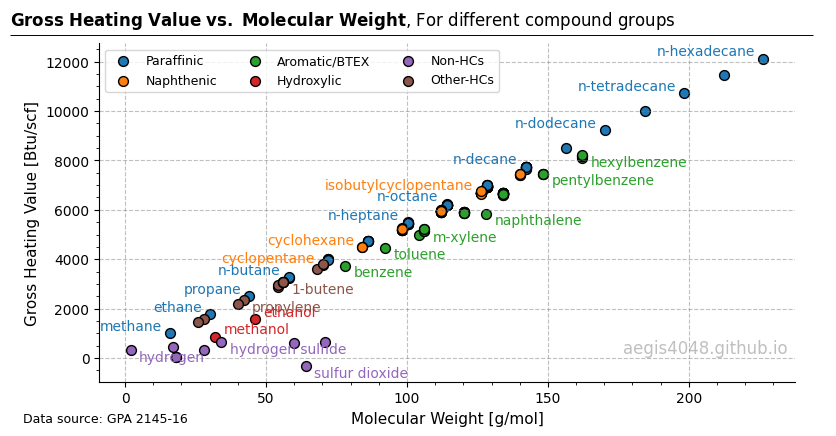

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('GPA 2145-16 Compound Properties Table - English - Truncated and PNA Identified.csv')

# Labeling for displaying texts
labels = ['methane', 'propane', 'n-butane', 'n-heptane', 'n-octane', 'n-decane', 'cyclohexane', 'cyclopentane', 'ethane',
'n-dodecane','n-tetradecane','n-hexadecane', 'methanol', 'ethanol', 'naphthalene', 'isobutylcyclopentane', 'hydrogen',
 'sulfur dioxide', 'hydrogen sulfide', 'toluene', 'benzene', 'm-xylene', 'pentylbenzene', 'hexylbenzene',
         'propylene', '1-butene'
         ]
df['Display Text'] = df['Compound'].isin(labels)

BTEX_idx = df[df['Is BTEX'] == True].index
aromatic_idx = df[df['Is Aromatic'] == True].index
non_HC_idx = df[df['Is Hydrocarbon'] == False].index
hydroxyl_idx = df[df['Is Hydroxyl'] == True].index
paraffinic_idx = df[df['Is Paraffinic'] == True].index
naphethenic_idx = df[df['Is Naphthenic'] == True].index
other_idx = df[df['Others'] == True].index
whole_idx = list(df.index)

x = df['Molar Mass [g/mol]']
y = df['Gross Heating Value Ideal Gas [Btu/ft^3]']

##################################### Plotting #######################################

fig, ax = plt.subplots(figsize=(8, 4.5))

alpha = 1
_1 = ax.scatter(x.loc[paraffinic_idx], y.loc[paraffinic_idx], s=50, edgecolor='k', alpha=alpha, label='Paraffinic')
_2 = ax.scatter(x.loc[naphethenic_idx], y.loc[naphethenic_idx], s=50, edgecolor='k', alpha=alpha, label='Naphthenic')
_3 = ax.scatter(x.loc[aromatic_idx], y.loc[aromatic_idx], s=50, edgecolor='k', alpha=alpha, label='Aromatic/BTEX')
_4 = ax.scatter(x.loc[hydroxyl_idx], y.loc[hydroxyl_idx], s=50, edgecolor='k', alpha=alpha, label='Hydroxylic')
_5 = ax.scatter(x.loc[non_HC_idx], y.loc[non_HC_idx], s=50, edgecolor='k', alpha=alpha, label='Non-HCs')
_6 = ax.scatter(x.loc[other_idx], y.loc[other_idx], s=50, edgecolor='k', alpha=alpha, label='Other-HCs')

c1 = _1.get_facecolor()[0]
c2 = _2.get_facecolor()[0]
c3 = _3.get_facecolor()[0]
c4 = _4.get_facecolor()[0]
c5 = _5.get_facecolor()[0]
c6 = _6.get_facecolor()[0]

ax.legend(fontsize=9, ncol=3)

texts = df['Compound']
for i, txt in enumerate(texts):
    if df['Display Text'].loc[i]:
        c = c5
        ha ='left'
        va = 'top'
        
        if df['Is Paraffinic'].loc[i]: 
            c = c1
            ha ='right'
            va = 'bottom'
        if df['Is Naphthenic'].loc[i]:
            c = c2
            ha ='right'
            va = 'bottom'
        if df['Is Aromatic'].loc[i]:
            c = c3
            va = 'top'
            ha = 'left'
        if df['Is Hydroxyl'].loc[i]:
            c = c4
            va = 'bottom'
            ha = 'left'
        if df['Others'].loc[i]:
            c = c6
            va = 'top'
            ha = 'left'
        
        if ha == 'left':
            icr = 3
        else:
            icr= -3
        
        ax.annotate(txt, (x.loc[i] + icr, y.iloc[i]), fontsize=10, c=c, ha=ha, va=va)

ax.minorticks_on()
ax.grid(axis='y', which='major', linestyle='--', color='grey', alpha=0.5)
#ax.grid(axis='y', which='minor', linestyle='--', color='grey', alpha=0.2)
#ax.grid(axis='x', which='minor', color='grey', linestyle='--', alpha=0.2)
ax.grid(axis='x', which='major', color='grey', linestyle='--', alpha=0.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xlabel('Molecular Weight [g/mol]', fontsize=11)
ax.set_ylabel('Gross Heating Value [Btu/scf]', fontsize=11)
ax.text(0.99, 0.1, 'aegis4048.github.io', fontsize=12, ha='right', va='center',
    transform=ax.transAxes, color='grey', alpha=0.5)

#ax.set_xlim(0, 1)
#ax.set_ylim(10000, 30000)

def setbold(txt):
    return ' '.join([r"$\bf{" + item + "}$" for item in txt.split(' ')])

bold_txt = setbold('Gross Heating Value vs. Molecular Weight')
plain_txt = r', For different compound groups'
fig.suptitle(bold_txt + plain_txt, verticalalignment='top', x=0, horizontalalignment='left', fontsize=12, y=0.96)
yloc = 0.88
ax.annotate('', xy=(0.01, yloc + 0.01), xycoords='figure fraction', xytext=(1.02, yloc + 0.01),
            arrowprops=dict(arrowstyle="-", color='k', lw=0.7))

ax.annotate('Data source: GPA 2145-16', xy=(-0.11, -.12), xycoords='axes fraction', fontsize=9)

fig.tight_layout()

fig.savefig('ghvs_vs_mws.png', dpi=300, bbox_inches='tight')

In [7]:
df.shape

(192, 17)